# Detekcija godina, pola i emocija

Student: Luka Dragičević IT50/2019

Predmet: Principi prezentacije i prepoznavanja oblika

Automatsko prepoznavanje pola, godina i emocija lica predstavlja klasifikacioni problem u kojem se slika svrstava u određene kategorije za svaku od pomenutih karakteristika. Ova tehnologija ima široku primenu u realnim sistemima i, prema autorima [1], značajno doprinosi poboljšanju sistema preporuke.

Duboke konvolucione neuronske mreže su se pokazale kao najbolje rešenje za ovaj problem zbog njihove sposobnosti da efikasno izdvoje važne karakteristike sa slika [1][2].

Kao zadatak dobio sam skup podataka koji se sastoji od dva foldera, pri čemu svaki folder sadrži po 5 podfoldera sa slikama koje se koriste za trening. Analizom lica čoveka možemo dobiti mnogo informacija kao što su starost, pol, emocije, itd. Računarski vid se koristi za obuku mašina kako bi razumele i tumačile stvarni svet. Korišćenjem digitalnih slika sa veb kamere, računari mogu precizno otkriti i klasifikovati objekte, a zatim reagovati na ono što "vide" u stvarnom svetu. Postoje različite primene identifikacije starosti i pola na licu, kao što je forenzičko testiranje. Prepoznavanje emocija sa lica može se koristiti za predviđanje interakcija između ljudi i računara.

[1] A. Singh, N. Rai2 & co. "Prepoznavanje pola, godina i emocija pomoću konvolucionih neuronskih mreža"

[2] D. J. Sharma, A. Sufian & co. "REGA: Real-Time prepoznavanje emocija, pola i godina pomoću CNN - pregled"

In [ ]:
# učitavanje seta podataka
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/u/0/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ&export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ&export=download' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')" -O images.zip && rm -rf /tmp/cookies.txt

--2023-07-05 22:33:45--  https://drive.google.com/u/0/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ&export=download&confirm=
Resolving drive.google.com (drive.google.com)... 74.125.200.101, 74.125.200.139, 74.125.200.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.200.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ&export=download&confirm [following]
--2023-07-05 22:33:45--  https://drive.google.com/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ&export=download&confirm
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/epncie98dm4n5nfoampn08iagof6l5hp/1688596425000/12172178362461080244/*/1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ?e=download&uuid=987b1094-0f90-46c6-93a9-40cfbbee34ae [following]
--2023-07-05 22:33:47--  https://doc-0k-9s-

In [ ]:
# unzipovanje podataka
!unzip images.zip

Archive:  images.zip
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg  
  inflating: data/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg  
  inflating

# Osnovne vizualizacije

In [ ]:
# dodavanje fajla sa metapodacima za trening set
!gdown --id 1EsLW-ribnmCpuIA1H904K895maRQuGfy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EsLW-ribnmCpuIA1H904K895maRQuGfy
To: /content/images_labels.xlsx
100% 12.6k/12.6k [00:00<00:00, 39.7MB/s]


In [ ]:
# dodavanje fajla sa metapodacima za validacioni set
!gdown --id 1KXQUYuosJe5xZx07zW3NoPDZD26UXhsU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXQUYuosJe5xZx07zW3NoPDZD26UXhsU
To: /content/validation_images_labels.xlsx
100% 9.75k/9.75k [00:00<00:00, 41.0MB/s]


In [ ]:
# učitavanje metapodataka u dataframe

import pandas as pd
import seaborn as sb
file = '/content/images_labels.xlsx'
df = pd.read_excel(file)
print(df)

                                             image_id gender  age  emotion
0   ./train/madonna/httpiamediaimdbcomimagesMMVBMT...      F   42        1
1   ./train/madonna/httpimagegaladevcmseamadonnapr...      F   39        0
2   ./train/madonna/httpimgclosermagfrvarclosermag...      F   35        1
3   ./train/madonna/httpmediavoguecomrwblondesdark...      F   38        0
4   ./train/madonna/httpresizeparismatchladmediafr...      F   46        0
..                                                ...    ...  ...      ...
88  ./train/jerry_seinfeld/httpwwwnndbcompeoplejer...      M   35        0
89  ./train/jerry_seinfeld/httpwwwpictureszimbioco...      M   40        1
90  ./train/jerry_seinfeld/httpwwwpsychiatrictimes...      M   42        1
91  ./train/jerry_seinfeld/httpwwwslatecomcontentd...      M   44        1
92  ./train/jerry_seinfeld/httpwwwwatchidcomsitesd...      M   27        0

[93 rows x 4 columns]


<ipython-input-6-1c76c824aeb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

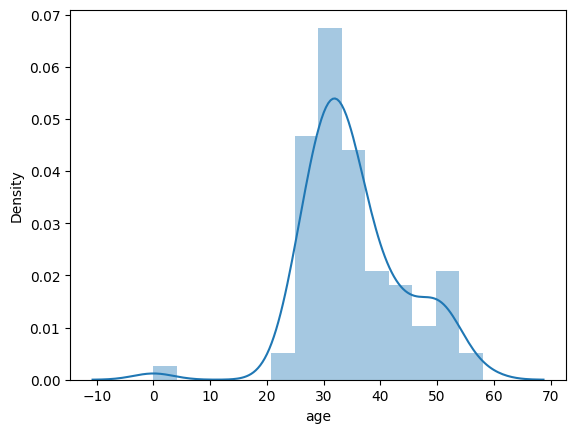

In [ ]:
# vizualizacija godina

sb.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

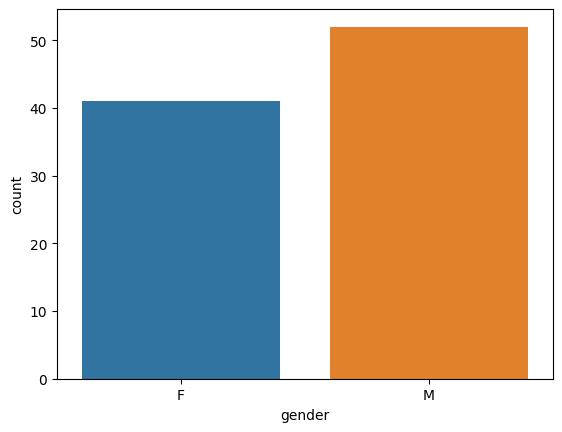

In [ ]:
# vizualizacija odnosa polova

sb.countplot(data=df, x='gender')

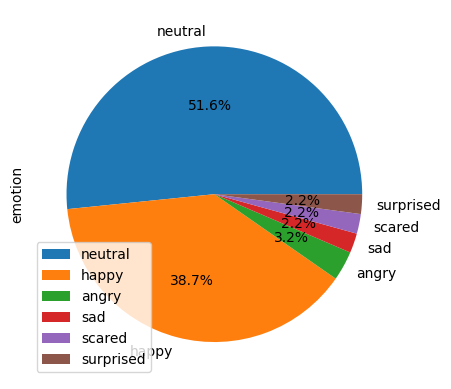

In [ ]:
# vizualizacija emocija

import matplotlib.pyplot as plt

df['emotion'] = df['emotion'].replace('0','neutral')
df['emotion'] = df['emotion'].replace('1','happy')
df['emotion'] = df['emotion'].replace('2','angry')
df['emotion'] = df['emotion'].replace('3','sad')
df['emotion'] = df['emotion'].replace('4','scared')
df['emotion'] = df['emotion'].replace('5','surprised')

df['emotion'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['neutral' , 'happy', 'angry', 'sad', 'scared', 'surprised'])
plt.legend()

# Detekcija pola i godina

Računarska vizija je polje istraživanja koje omogućava računarima da "vide" i identifikuju digitalne slike i video zapise na sličan način kao što to radi čovek. Izazovi s kojima se susreće uveliko proističu iz ograničenog razumevanja biološkog vida. Računarska vizija obuhvata procese sticanja, obrade, analize i razumevanja digitalnih slika radi izvlačenja visokodimenzionalnih podataka iz stvarnog sveta, koje se zatim mogu koristiti za donošenje odluka. Ovaj proces često uključuje tehnike kao što su prepoznavanje objekata, praćenje pokreta, procena i obnova slike.

**OpenCV** je skraćenica od "Open Source Computer Vision" (Računarska vizija otvorenog koda). Kao što ime sugeriše, OpenCV je biblioteka otvorenog koda koja se koristi za obradu slika i video zapisa u stvarnom vremenu, a istovremeno pruža i analitičke mogućnosti. Podržava popularne okvire za duboko učenje poput TensorFlow-a, Caffe-a i PyTorch-a.

**Konvolucijska neuronska mreža** (CNN) je vrsta duboke neuronske mreže koja se često koristi za prepoznavanje i obradu slika, kao i za obradu prirodnog jezika (NLP). CNN, takođe poznata kao ConvNet, ima ulazne i izlazne slojeve, kao i više skrivenih slojeva, pri čemu mnogi od njih koriste konvoluciju. CNN se može posmatrati kao regularizovana verzija višeslojnog perceptrona.

In [ ]:
!git clone https://github.com/misbah4064/age_and_gender_detection.git
%cd age_and_gender_detection

Cloning into 'age_and_gender_detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (11/11), 1.33 MiB | 7.40 MiB/s, done.
/content/age_and_gender_detection


In [ ]:
# preuzimanje unapred istreniranih podataka
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
# unzipovanje modela
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/age_and_gender_detection/modelNweight.zip
100% 86.2M/86.2M [00:00<00:00, 186MB/s]
Archive:  modelNweight.zip
replace modelNweight/age_deploy.prototxt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Dodavanje potrebnih modula
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

# traženje koordinata za okvir

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

# učitavanje fajlova za model i težinu

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
# lista godina
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
# lista polova
genderList = ['Male', 'Female']

# Load network (težina, konfiguracija)
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # iščitavanje frejma
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:

        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predikcija godina i pola detektovanih lica
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        # Iscrtavanje rezultata
        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

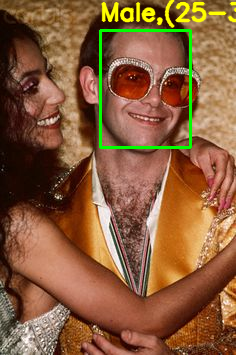

In [ ]:
#učitavanje slike i prikaz rezultata
input = cv.imread("/content/train/elton_john/httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

# Detekcija emocija

Izdvajaju se ključne tačke lica i na osnovu njih prepoznaje se koja je emocija u pitanju. Dodatni set podataka je korišćen za obučavanje, pošto set podataka nije inicijalno bio predviđen za predviđanje emocija već lica.

In [ ]:
!pip install tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# pribavljanje podataka za trening
filname = '/content/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:
# preuzimanje podataka iz fajla i smještanje u liste

import numpy as np

def getData(filename):
    Y = []
    X = []

    first = True
    for line in open(filename):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    length = len(X)
    i = 0
    X = np.array(X)
    while i < length:
        X[i] = [c/255.0 for c in X[i]]
        i += 1

    print(X.shape)
    Y = np.array(Y)
    return X, Y


In [ ]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

(5875, 2304)
7


In [ ]:
# slike formatiramo kao 48x48
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

# podjela trening : validacija : test  80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

Kreiramo sekvencijalni model

Prvi sloj vezan je za ulazne slikame, koje se vide kao dvodimenzionalne matrice. Broj čvorova je 64, a matrica je 5x5. Koristimo funkciju aktivacije ReLU ili Rectified Linear Activation. Dokazano je da ova funkcija aktiviranja dobro funkcioniše u neuronskim mrežama. MaxPooling2D slojevi se koriste za smanjenje dimenzija mapa karakteristika. Tako se smanjuje broj parametara za učenje i količina računanja izvedenih u mreži.

Između slojeva Conv2D i Dense nalazi se sloj Flatten koji nam služi kao veza među tim slojevima. Dense koristimo za naš izlazni sloj. Dropout sloj služi za sprečavanje overfitting-a.

U izlaznom sloju imaćemo 7 čvorova, po jedan za svaki mogući ishod. Aktivacija je softmax. Softmax čini zbir izlaza do 1 tako da se izlaz može tumačiti kao verovatnoća. Model će zatim napraviti svoje predviđanje na osnovu opcije koja ima najveću verovatnoću.

Nakon toga vrši se kompajliranje modela.

Koristićemo Adam kao naš optimizator za kontrolu brzine učenja. Za funkciju gubitka koristićemo categorical_crossentropy. Niži rezultat ukazuje na to da model radi bolje. Kao metriku koristićemo accuracy da bismo videli rezultat tačnosti na skupu provere prilikom obuke modela.

In [ ]:
# kreiranje CNC modela i dodavanje slojeva

def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [ ]:
import tensorflow.keras.backend as K
from keras.preprocessing.image import ImageDataGenerator

# Čuva model na ovoj lokaciji za svaku epohu
path_model = 'model_filter.h5'

# Uništava trenutni graf i kreira novi
K.clear_session()

# Kreiranje modela
model = my_model()

# Podešavanje stope učenja
K.set_value(model.optimizer.lr, 1e-4)


# Dodavanje Dropout sloja
model.add(Dropout(0.5))

# Fitovanje modela sa promenama
h = model.fit(x=X_train,
              y=y_train,
              batch_size=64,
              epochs=20,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True,
              callbacks=[ModelCheckpoint(filepath=path_model)]
              )




Epoch 1/20
83/83 [==============================] - 8s 40ms/step - loss: nan - accuracy: 0.1871 - val_loss: 1.8566 - val_accuracy: 0.2551
Epoch 2/20
83/83 [==============================] - 3s 38ms/step - loss: nan - accuracy: 0.2016 - val_loss: 1.8338 - val_accuracy: 0.2551
Epoch 3/20
83/83 [==============================] - 3s 38ms/step - loss: nan - accuracy: 0.2098 - val_loss: 1.8207 - val_accuracy: 0.2551
Epoch 4/20
83/83 [==============================] - 3s 37ms/step - loss: nan - accuracy: 0.2069 - val_loss: 1.8176 - val_accuracy: 0.2517
Epoch 5/20
83/83 [==============================] - 3s 36ms/step - loss: nan - accuracy: 0.2050 - val_loss: 1.8174 - val_accuracy: 0.2534
Epoch 6/20
83/83 [==============================] - 3s 37ms/step - loss: nan - accuracy: 0.2230 - val_loss: 1.8168 - val_accuracy: 0.2602
Epoch 7/20
83/83 [==============================] - 3s 39ms/step - loss: nan - accuracy: 0.2255 - val_loss: 1.8017 - val_accuracy: 0.2636
Epoch 8/20
83/83 [================

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


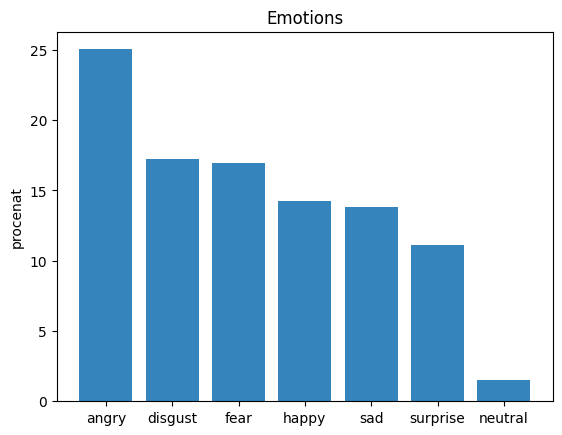

In [ ]:
# analiza emocija

import pandas as pd
import matplotlib.pyplot as plt

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = range(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.xticks(y_pos, objects)
    plt.ylabel('procenat')
    plt.title('Emotions')

data = pd.read_csv('/content/fer2013.csv')
emotions = data['emotion']

emotions_counts = emotions.value_counts()
emotions_percentages = emotions_counts / len(emotions) * 100

emotion_analysis(emotions_percentages)
plt.show()


In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

19/19 [==============================] - 0s 8ms/step


(588, 7)

1/1 [==============================] - 0s 22ms/step


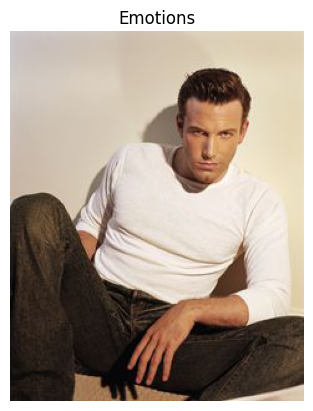

Expression Prediction: happy


In [ ]:
import skimage
from skimage import io

# Učitavanje slike
img = io.imread('/content/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', as_gray=True)
show_img = io.imread('/content/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg')

# Promena veličine slike
resized_img = skimage.transform.resize(img, (48, 48), anti_aliasing=True)

# Normalizacija 0.0-1.0
normalized_img = resized_img / 255.0

# Predikcija
custom = model.predict(np.expand_dims(normalized_img, axis=0))
emotion_analysis(custom[0])

# Prikaz slike
plt.imshow(show_img)
plt.axis('off')
plt.show()

# Ispis rezultata
expression_index = np.argmax(custom[0])
print('Expression Prediction:', objects[expression_index])


# DeepFace analiza

**DeepFace** je sistem dubokog učenja za prepoznavanje lica koji je kreirala istraživačka grupa na Fejsbuku. On identifikuje ljudska lica na digitalnim slikama. Program koristi devetoslojnu neuronsku mrežu sa preko 120 miliona težinskih veza i obučen je na četiri miliona slika koje su postavili korisnici Fejsbuka. **DeepFace** dostiže tačnost od 97,35% ± 0,25% na skupu podataka označenih LFV, gde ljudi imaju 97,53%. To znači da je **DeepFace** ponekad uspešniji od ljudskih bića.

In [ ]:
#dodavanje potrebnih biblioteka
!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=d544efa6d50f28840c3b3a4eedd2e327110ab1d05015658f6d1a0695e28b207c
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


<function matplotlib.pyplot.show(close=None, block=None)>

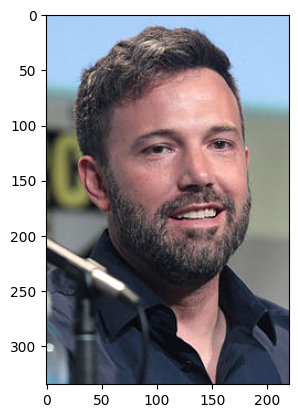

In [ ]:
#učitavanje i prikaz slike
img1=cv2.imread('/content/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg')
plt.imshow(img1[:,:,::-1])
plt.show

In [ ]:
# Analyzing gender, age, and emotion and printing the results
result = DeepFace.analyze(img1, actions=['gender', 'age', 'emotion'], enforce_detection=False)
print("Gender: ", result[0]['gender'])
print("Age: ", result[0]['age'])
print("Emotion: ", result[0]['emotion'])



Action: emotion: 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]

Gender:  {'Woman': 0.0006873037364130141, 'Man': 99.9993085861206}
Age:  31
Emotion:  {'angry': 7.287190978519546e-05, 'disgust': 7.684621105830329e-08, 'fear': 0.7059409462652334, 'happy': 95.11172887999322, 'sad': 0.01218643229130966, 'surprise': 0.015804832816554978, 'neutral': 4.154255740819993}


<function matplotlib.pyplot.show(close=None, block=None)>

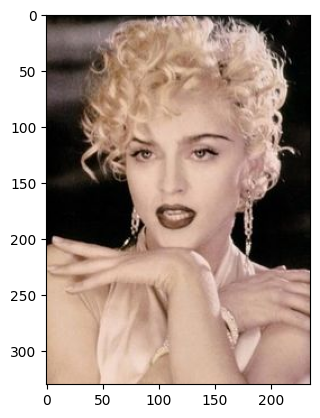

In [ ]:
#učitavanje i prikaz slike
img2=cv2.imread('/content/train/madonna/httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg')
plt.imshow(img2[:,:,::-1])
plt.show

In [ ]:
# Analyzing gender, age, and emotion and printing the results
result = DeepFace.analyze(img2, actions=['gender', 'age', 'emotion'], enforce_detection=False)
print("Gender: ", result[0]['gender'])
print("Age: ", result[0]['age'])
print("Emotion: ", result[0]['emotion'])

Action: emotion: 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

Gender:  {'Woman': 98.72556924819946, 'Man': 1.2744312174618244}
Age:  31
Emotion:  {'angry': 1.308329775929451, 'disgust': 4.468073466767919e-07, 'fear': 1.7619799822568893, 'happy': 0.0016489455447299406, 'sad': 3.3572278916835785, 'surprise': 0.46395002864301205, 'neutral': 93.10685992240906}


# Zaključak

Uprkos izazovima u vezi sa skupom podataka, uspeli smo da primenimo odgovarajuće tehnike i algoritme za analizu pola, godina i emocija na slikama. Rezultati koje smo dobili predstavljaju korak ka razumevanju karakteristika lica i otvaraju mogućnosti za dalje istraživanje u ovoj oblasti.

Važno je napomenuti da iako su rezultati značajni i pružaju uvid u ove karakteristike, njihova tačnost može varirati u zavisnosti od kvaliteta slike, uslova osvetljenja i drugih faktora. Takođe, uključivanje dodatnih podataka ili promena parametara modela mogu dalje poboljšati rezultate.

